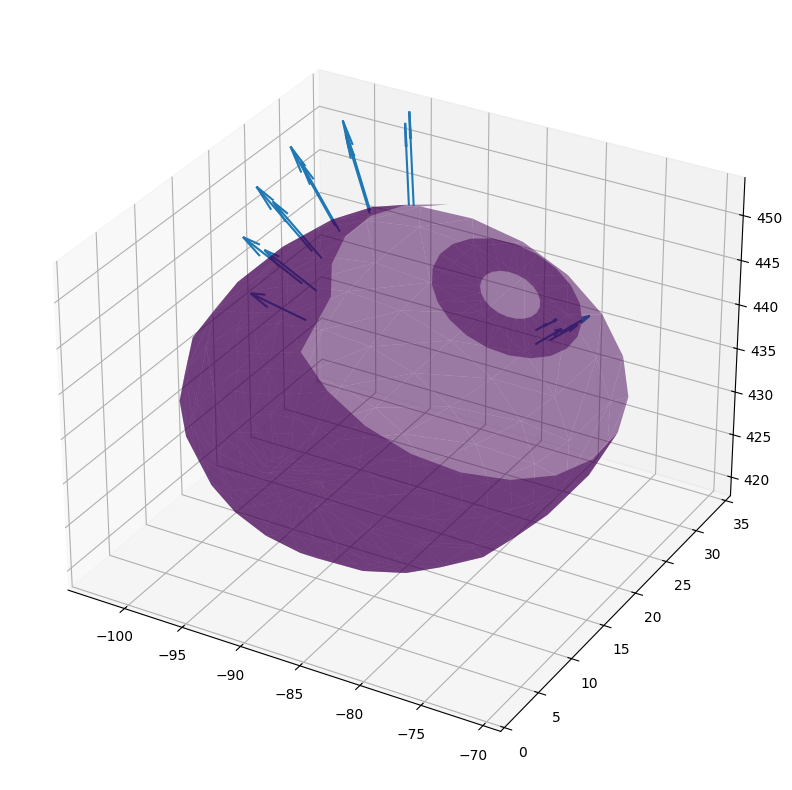

In [6]:

import read
geo_dir = '/p/ltxdata/Li_evporator/Li_Evap_Source/Fortran_Source/CAD_Source/geom_mark2'
#geo_dir = '/p/ltxdata/Li_evporator/test_geom'
geom = read.geometry(geo_dir)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

show_faces = [i for i in range(0,366)]
show_norms = [i for i in range(350,366)]
X = np.array(geom['source']['x'])[show_faces]
Y = np.array(geom['source']['y'])[show_faces]
Z = np.array(geom['source']['z'])[show_faces]
C = np.array(geom['source']['centroid'])[show_faces]
N = np.array(geom['source']['norm'])[show_faces]
index = np.array([i for i in range(len(geom['source']['x']))])[show_faces]


import show
for i,x,y,z,c,n in zip(index,X,Y,Z,C,N):
	show.patch(ax,x,y,z,0)
	if i in show_norms:
		ax.quiver(c[0],c[1],c[2],n[0],n[1],n[2],length=0.5)
	#ax.quiver(c[0],c[1],c[2],n[0],n[1],n[2],length=0.5)

show.set_axes_equal(ax)

In [27]:
show_faces = [i for i in range(0,366)]
geom['source']['y'][i for i in range(0,366)]

SyntaxError: invalid syntax (1672384627.py, line 2)

In [2]:
import trimesh 
import numpy as np

mesh = trimesh.load_mesh('/p/ltxdata/Li_evporator/Li_Evap_Source/Fortran_Source/CAD_Source/shell_mod_coarse_faces_2024.stl')
thickness_ro = np.zeros(len(mesh.faces))
# read LTX_SO.txt and LTX_RO_true.txt to get deposition on faces
with open('LTX_R0.txt') as f:
    lines = f.readlines()
    # read second column of the file
    for i,line in enumerate(lines):
        thickness_ro[i] = float(line.split()[1])
thickness_so = np.zeros(len(mesh.faces))
with open('LTX_SO.txt') as f:
    lines = f.readlines()
    # read second column of the file
    for i,line in enumerate(lines):
        thickness_so[i] = float(line.split()[1])
        
thickness = thickness_ro + thickness_so
faces_to_color = np.arange(len(mesh.faces)).tolist()
color = trimesh.visual.interpolate(thickness, color_map='coolwarm')
# set to white if thickness is zero
color[thickness==0.0] = [0,0,0,0]
mesh.visual.face_colors[faces_to_color] = color[faces_to_color]

source_mesh = trimesh.load_mesh('/p/ltxdata/Li_evporator/Li_Evap_Source/Fortran_Source/CAD_Source/source.stl')
source_mesh.visual.face_colors = [255,0,0,255]

source_obs = '/p/ltxdata/Li_evporator/Li_Evap_Source/Fortran_Source/CAD_Source/obs_source.stl'
source_obs_mesh = trimesh.load_mesh(source_obs)
source_obs_mesh.visual.face_colors = [0,0,255,255]


# add the two meshes together into a single obj and export
combined_mesh = mesh + source_mesh + source_obs_mesh 

combined_mesh.export('deposition_new.obj')


'# https://github.com/mikedh/trimesh\nv -467.25463867 -76.19999695 467.25463867 0.36470588 0.48627451 0.89803922\nv -462.72857666 -94.51423645 462.72857666 0.35686275 0.47058824 0.89019608\nv -485.16003418 -76.19999695 440.45736694 0.38823529 0.50980392 0.90980392\nv -477.36822510 -102.42351532 435.25708008 0.38039216 0.50588235 0.90980392\nv -495.27590942 -102.42351532 408.45632935 0.42745098 0.56078431 0.94509804\nv -485.83880615 -127.86334229 402.15170288 0.39215686 0.51764706 0.92156863\nv -503.73922729 -127.86334229 375.36178589 0.37647059 0.49411765 0.89803922\nv -492.79989624 -152.39485168 368.05871582 0.36470588 0.48235294 0.89411765\nv -510.71408081 -152.39485168 341.24822998 0.35686275 0.47058824 0.88627451\nv -498.54125977 -176.08345032 333.11462402 0.37254902 0.49019608 0.89803922\nv -528.62866211 -152.39485168 314.43719482 0.39215686 0.50980392 0.90980392\nv -516.45886230 -176.08345032 306.29898071 0.41568627 0.54509804 0.92941176\nv -546.52484131 -152.39485168 287.6536865

In [3]:
len(mesh.area_faces)
# make a list indix from 0 to len(mesh.faces)
faces = np.arange(len(mesh.faces)).tolist()

In [87]:
[10:15]

SyntaxError: invalid syntax (620416489.py, line 1)

In [10]:
chunk_size = int(len(geom['target']['areas'])/4000)

In [1]:
import generate_geom

fine_mesh = '/p/ltxdata/Li_evporator/Li_Evap_Source/Fortran_Source/CAD_Source/shell_coarse_2024_green.stl'
out = '/p/ltxdata/Li_evporator/Li_Evap_Source/Fortran_Source/CAD_Source/shell_mod_coarse_faces_2024_green.stl'

generate_geom.extract_faces(file=fine_mesh,output=out)

Total 1372 detected


In [4]:
from stl import mesh 
import numpy as np
reduced_mesh = mesh.Mesh.from_file(fine_mesh)
idx = np.where(reduced_mesh.data['attr'] > 8000 and reduced_mesh.data['attr'] < 9000)[0]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [12]:
len(np.where(reduced_mesh.data['attr']== 8833)[0])

1372